In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [6]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size = 0.2, random_state = 33)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(train_data.shape, train_labels.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [7]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

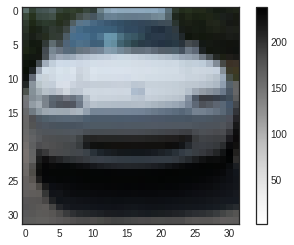

In [8]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [9]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(40000, -1)
x_val = x_val.reshape(10000, -1)
x_test = x_test.reshape(10000, -1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [11]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [16]:
x_train[0]

array([0.35686275, 0.43529412, 0.41568627, ..., 0.36862745, 0.36078431,
       0.35686275])

In [19]:
y_train[0]

array([1], dtype=uint8)

In [12]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Input(shape=(x_train.shape[1], )))
model.add(layers.Dense(512, name='hidden1'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, name='hidden2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0

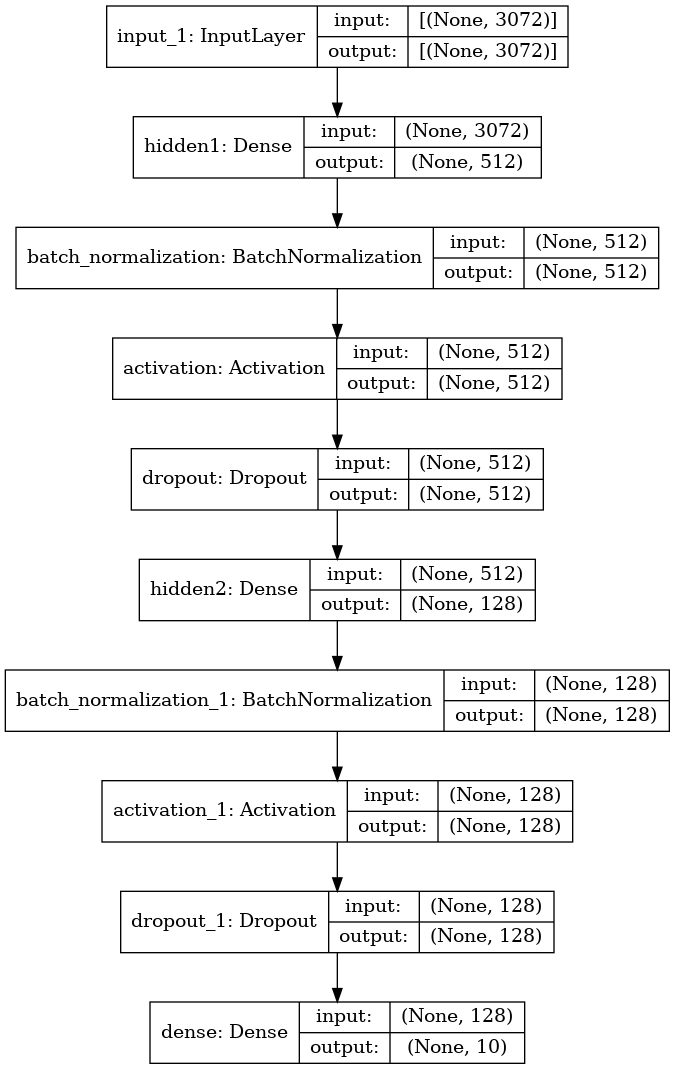

In [15]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

In [21]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from keras import callbacks

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('keras_CIFAR10.h5',
                                           save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
1250/1250 [==============================] - 6s 3ms/step - loss: 1.9559 - accuracy: 0.3106 - val_loss: 1.7900 - val_accuracy: 0.3664
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7215 - accuracy: 0.3825 - val_loss: 1.7560 - val_accuracy: 0.3786
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6604 - accuracy: 0.4067 - val_loss: 1.6881 - val_accuracy: 0.3928
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6136 - accuracy: 0.4231 - val_loss: 1.5786 - val_accuracy: 0.4380
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5820 - accuracy: 0.4340 - val_loss: 1.6159 - val_accuracy: 0.4240
Epoch 6/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5532 - accuracy: 0.4453 - val_loss: 1.5218 - val_accuracy: 0.4684
Epoch 7/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5265 - accuracy: 0.4541 - val_loss: 1.5014 - val_ac

1250/1250 [==============================] - 4s 3ms/step - loss: 1.1101 - accuracy: 0.6021 - val_loss: 1.3591 - val_accuracy: 0.5299
Epoch 58/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1100 - accuracy: 0.6059 - val_loss: 1.3527 - val_accuracy: 0.5269
Epoch 59/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0940 - accuracy: 0.6100 - val_loss: 1.3147 - val_accuracy: 0.5392
Epoch 60/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0988 - accuracy: 0.6092 - val_loss: 1.4002 - val_accuracy: 0.5101
Epoch 61/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0950 - accuracy: 0.6088 - val_loss: 1.4055 - val_accuracy: 0.5139
Epoch 62/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0908 - accuracy: 0.6155 - val_loss: 1.4614 - val_accuracy: 0.4950
Epoch 63/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0857 - accuracy: 0.6127 - val_loss: 1.3300 - val_accuracy

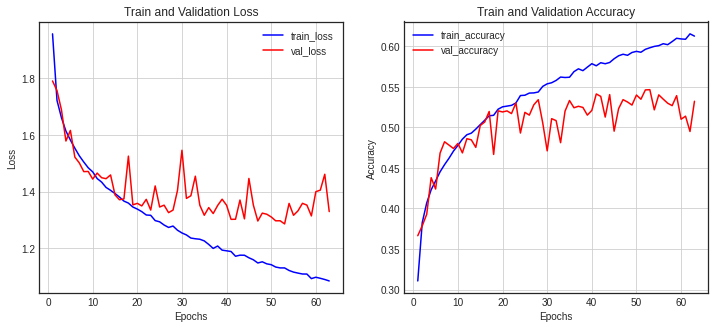

In [22]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()
     

In [23]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2894 - accuracy: 0.5372


[1.2894237041473389, 0.5371999740600586]